In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
# Load the dfset
df = pd.read_csv('tips (data for regression problem).csv')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [53]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [54]:
# Check for missing values
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [55]:
# Separate numeric and categorical columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns


In [56]:
# Fill numeric columns with the mean value
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [57]:
from sklearn.preprocessing import LabelEncoder

# For categorical columns, fill missing values with the mode (most common value)
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Encoding categorical variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder if needed later


C:\Users\Tanish\AppData\Local\Temp\ipykernel_17124\174709663.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [58]:
# Split data into features and target variable
X = df.drop(columns=['tip'])
y = df['tip']

numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Scale only the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Train each model and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    results[name] = {
        'MAE': mean_absolute_error(y_test, predictions),
        'RMSE': np.sqrt(mean_squared_error(y_test, predictions)),
        'R2 Score': r2_score(y_test, predictions)
    }
    print(f'{name} - MAE: {results[name]["MAE"]}, RMSE: {results[name]["RMSE"]}, R2 Score: {results[name]["R2 Score"]}')


Linear Regression - MAE: 0.6703807496461148, RMSE: 0.8335544185167326, R2 Score: 0.4441368826121954
Ridge Regression - MAE: 0.6697162755342894, RMSE: 0.8323411522382482, R2 Score: 0.445753859615002
Lasso Regression - MAE: 1.047104133961277, RMSE: 1.2036062575607012, R2 Score: -0.15896098636013822
Decision Tree - MAE: 0.9351020408163266, RMSE: 1.1904380946285518, R2 Score: -0.13374027532892696
Random Forest - MAE: 0.7613102040816329, RMSE: 0.9488905519562506, R2 Score: 0.279668863612766
Support Vector Regression - MAE: 0.6124543684795579, RMSE: 0.78826402213678, R2 Score: 0.5029004697226529
K-Nearest Neighbors - MAE: 0.6964897959183675, RMSE: 0.8703765077862122, R2 Score: 0.39394189461136175


In [60]:
# Cross-validation for each model

from sklearn.model_selection import cross_val_score
cv_results = {}
for name, model in models.items():
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    cv_results[name] = cv_score.mean()
    print(f'{name} - Cross-Validated R2 Score: {cv_results[name]}')


Linear Regression - Cross-Validated R2 Score: 0.3191967183987483
Ridge Regression - Cross-Validated R2 Score: 0.32065204121248336
Lasso Regression - Cross-Validated R2 Score: -0.013383802095549879
Decision Tree - Cross-Validated R2 Score: -0.22282651397569975
Random Forest - Cross-Validated R2 Score: 0.35442276593345595
Support Vector Regression - Cross-Validated R2 Score: 0.30943002494317273
K-Nearest Neighbors - Cross-Validated R2 Score: 0.3105826502821321


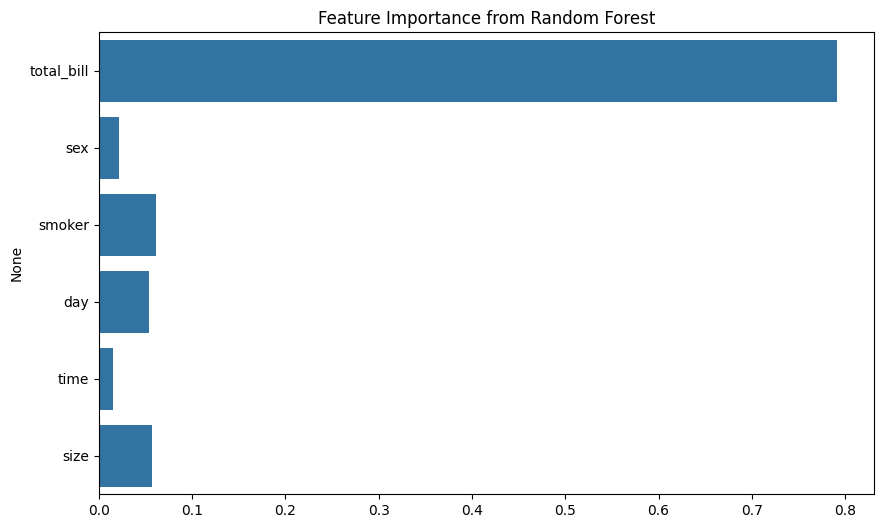

In [61]:
# Extract feature importances from tree-based models
feature_importances = models['Random Forest'].feature_importances_
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title('Feature Importance from Random Forest')
plt.show()

# print(feature_importances)


## Inferences and Improvements

Based on the feature importance chart from the Random Forest model, we can provide the following actionable insights to help restaurants improve customer service strategies and revenue management:

1. **Focus on the Total Bill**: Since the total bill is by far the most significant factor impacting tip amounts, restaurant management should consider ways to optimize average spending per customer. Strategies could include:
   - **Upselling and Cross-selling**: Train staff to suggest popular add-ons, appetizers, and beverages that enhance the dining experience and increase the total bill.
   - **Specials and Bundled Offers**: Offer meal bundles or add-on discounts that encourage customers to order more, increasing the bill size.

2. **Consider the Impact of Group Size**: Group size has a notable influence on tip amounts. Larger groups may tip more due to higher bills, so management can:
   - **Tailor Service for Large Groups**: Provide more attentive service, faster table setups, and group-friendly menu options to improve the experience for larger parties.

3. **Gender**: 
   - **Menu design**: Consider creating menu items or specials that appeal to different gender preferences, potentially increasing overall satisfaction and tipping behavior.

3. **Smoking Preference**: 
   - **Seating arrangement**: Optimize seating layouts to accommodate both smoking and non-smoking preferences effectively, ensuring customer satisfaction for both groups.
   - **Ventilation improvements**: If smoking is allowed, invest in better ventilation systems to minimize smoke drift, potentially increasing comfort and tipping behavior from non-smoking customers.
   - **Non-smoking incentives**: If non-smokers tend to tip more, consider offering special promotions or loyalty programs for non-smoking sections to encourage higher-tipping customer retention.
   
5. **Day of the Week**: The day of the week also influences tipping behavior.
   - **Special Offers on Slow Days**: If certain days consistently show lower tipping or spending, run special promotions or loyalty programs to encourage more visits.
   - **Optimize Staffing Levels**: Align staffing levels with expected customer turnout based on the day of the week, ensuring customers get the right service quality without overstaffing.

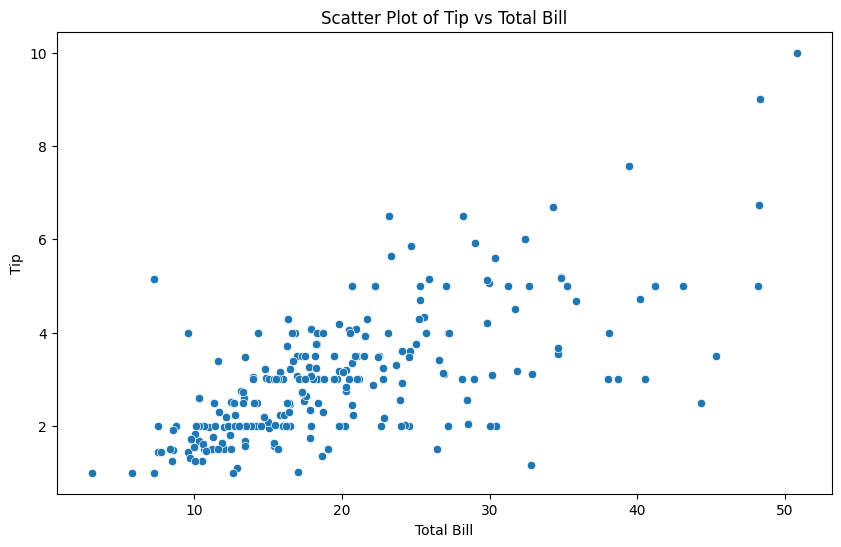

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_bill', y='tip')
plt.title('Scatter Plot of Tip vs Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

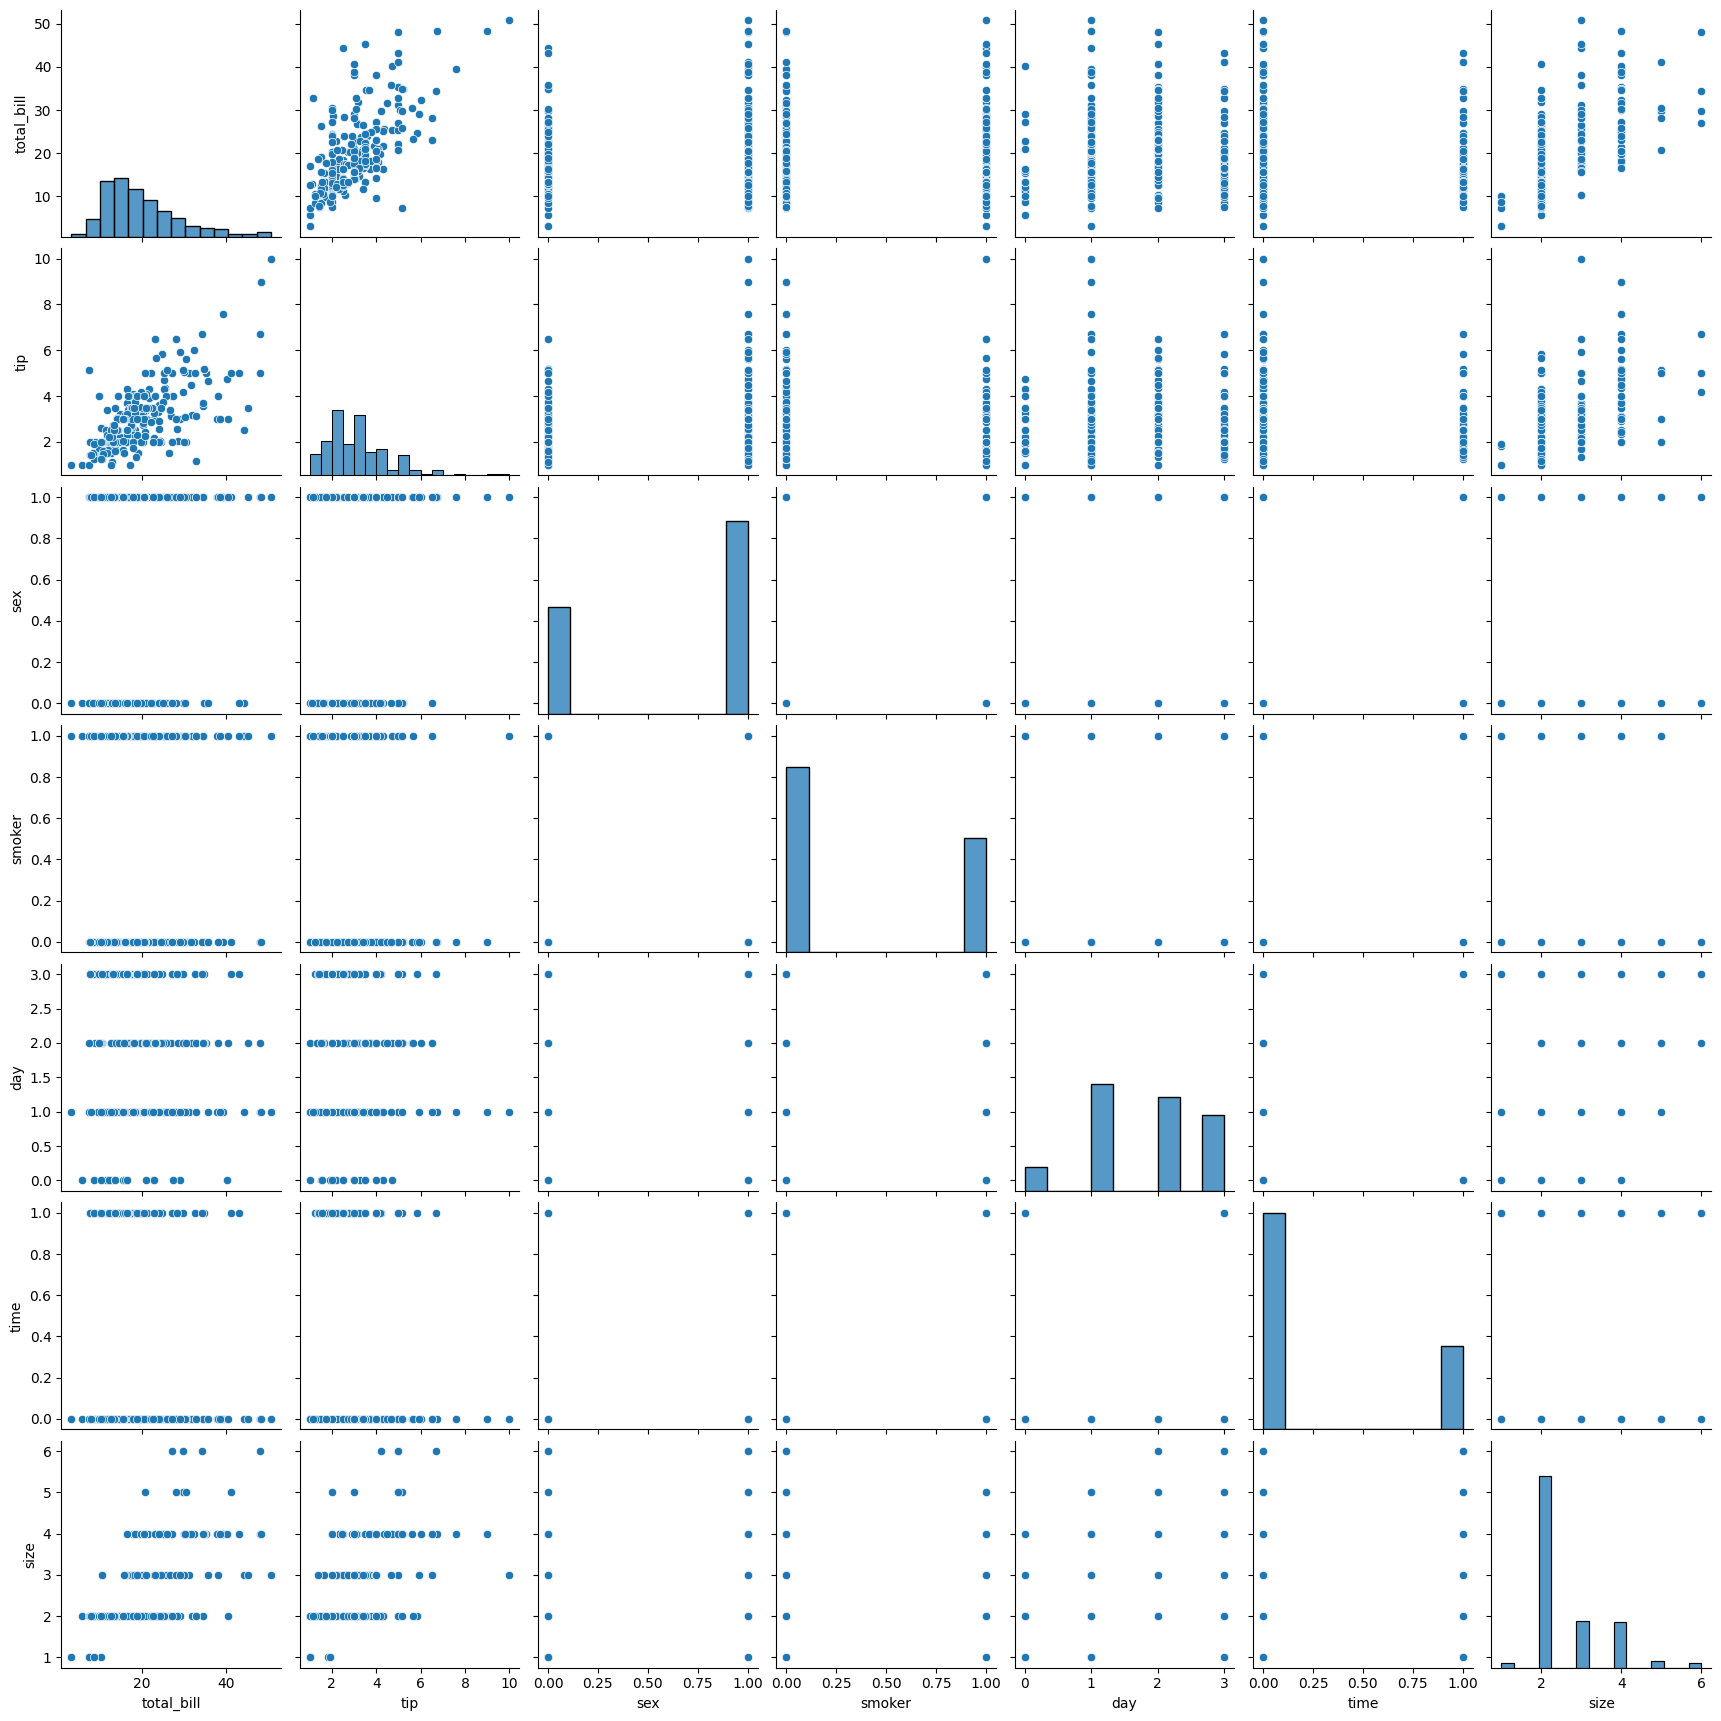

In [63]:
# Pair plot for multiple features
sns.pairplot(df)
plt.show()


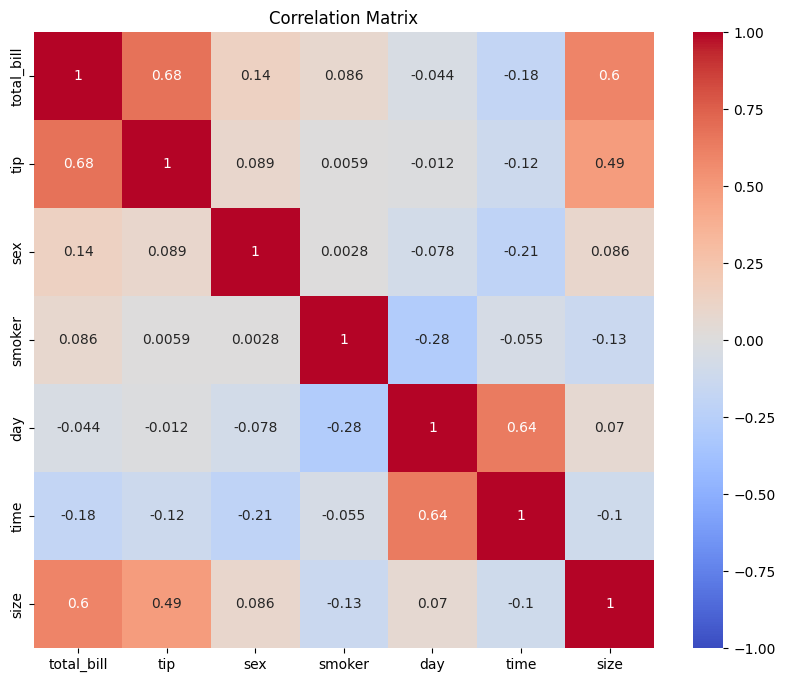

In [64]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [65]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

# Prepare data for regression
X = sm.add_constant(df.drop(columns='tip'))
y = df['tip']

# Fit an OLS model
model = sm.OLS(y, X).fit()

# Perform Rainbow Test for linearity
rainbow_stat, rainbow_p_val = linear_rainbow(model)
print(f'Rainbow Test Statistic: {rainbow_stat}, p-value: {rainbow_p_val}')

# Interpretation
if rainbow_p_val < 0.05:
    print("The data does not follow a linear trend (p < 0.05).")
else:
    print("The data follows a linear trend (p >= 0.05).")


Rainbow Test Statistic: 1.2036274510126592, p-value: 0.1579846422201335
The data follows a linear trend (p >= 0.05).


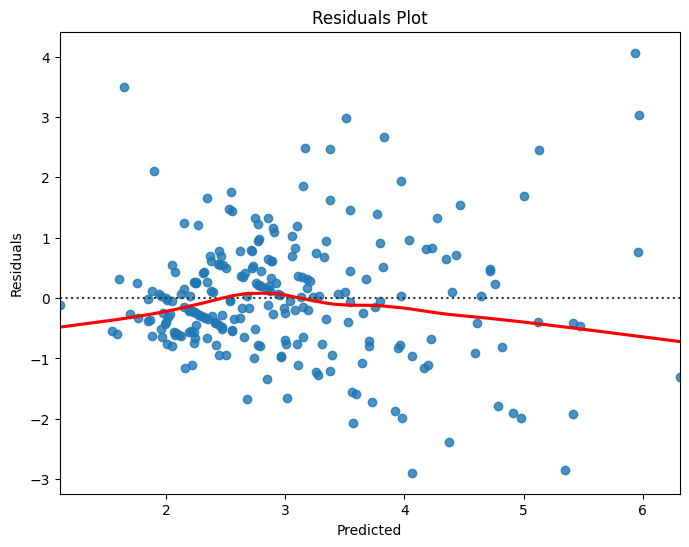

In [66]:
# Plot residuals
predictions = model.predict(X)
residuals = y - predictions

plt.figure(figsize=(8, 6))
sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


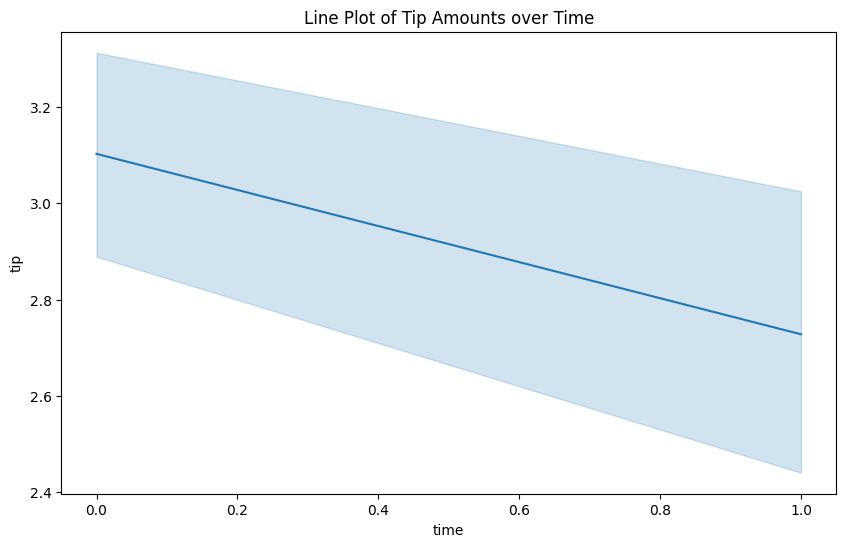

In [67]:
# Line plot 
if 'time' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='time', y='tip')
    plt.title('Line Plot of Tip Amounts over Time')
    plt.show()


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X = df.drop(columns=['tip'])
y = df['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose model based on linearity findings
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.6948129686287711
R-squared: 0.4441368826121931


In [69]:
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X = df.drop(columns=['tip'])  
y = df['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train each model, then evaluate its accuracy
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(max_depth=5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf', C=1.0, epsilon=0.1),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5)
}

# Train each model and evaluate performance
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the performance
    print(f"{name} - MSE: {mse:.2f}, R2: {r2:.2f}")



Linear Regression - MSE: 0.69, R2: 0.44
Ridge Regression - MSE: 0.69, R2: 0.45
Lasso Regression - MSE: 0.59, R2: 0.53
Decision Tree - MSE: 0.88, R2: 0.30
Random Forest - MSE: 0.96, R2: 0.23
Support Vector Regression - MSE: 0.54, R2: 0.57
K-Nearest Neighbors - MSE: 0.84, R2: 0.33


### Model Performance Summary

**Lasso Regression** emerges as the best-performing model for predicting tip amounts, achieving:
- **MSE**: 0.59 (lowest among models)
- **R²**: 0.53 
This indicates that Lasso Regression strikes the best balance between minimizing error and explaining the variance in the data.

**Support Vector Regression (SVR)** also performs strongly, with:
- **MSE**: 0.54 
- **R²**: 0.57 (slightly higher than Lasso)

While SVR has a better R² score, indicating it explains more variance, Lasso has a slight edge in MSE, meaning it minimizes error better.
